In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

per_game = 'NBA_2017_2018_Statistics.csv'
per_36min = 'NBA_2017_2018_Statistics_per_36 min.csv'
nba_salary = 'NBA_season17_18_salary.csv'

per_game = pd.read_csv(per_game)
per_36min = pd.read_csv(per_36min)
nba_salary = pd.read_csv(nba_salary)

per_36min = pd.DataFrame(per_36min)
nba_salary = pd.DataFrame(nba_salary)

In [2]:
per_36min_df = pd.merge(per_36min, nba_salary, on= "Player & Team", how="outer")
per_36min_df = per_36min_df.drop(columns=['Player & Team','Player_y', 'Team_y','ORB','DRB',
                                        '3P','3PA','3P%','2P','2PA','2P%'])
per_36min_df = per_36min_df.rename(columns={'Player_x':'Player','Team_x':'Team'})
per_36min_df = per_36min_df.dropna()

#82 games x 48 minutes per game = 3,936 minutes per game 

per_36min_df["Salary per min"] = round(per_36min_df["season17_18"]/3936,2)
per_36min_df["Salary per 36 min"] = per_36min_df["Salary per min"] * 36

#calculate avg. missed field goal attempts

per_36min_df["FGM"] = per_36min_df["FGA"] - per_36min_df["FG"]

#calculate avg. missed free throw attempts

per_36min_df["FTM"] = per_36min_df["FTA"] - per_36min_df["FT"]

#calculate player efficiency formula: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO)

per_36min_df["Player Efficiency Rating"] = per_36min_df["PTS"] + per_36min_df["TRB"] + per_36min_df["AST"] + per_36min_df["STL"] + per_36min_df["BLK"] - per_36min_df["FGM"] - per_36min_df["FTM"]

per_36min_df.reset_index()

,index,Player,Team,Pos,Age,G,GS,MP,FG,FGA,...,BLK,TOV,PF,PTS,season17_18,Salary per min,Salary per 36 min,FGM,FTM,Player Efficiency Rating
0,0,Aaron Brooks,MIN,PG,33.0,32.0,1.0,189.0,5.3,13.1,...,0.0,2.1,5.3,14.3,2116955.0,537.84,19362.24,7.8,0.6,14.0
1,1,Aaron Gordon,ORL,PF,22.0,58.0,57.0,1909.0,7.1,16.3,...,0.8,2.0,2.1,19.3,5504420.0,1398.48,50345.28,9.2,1.2,22.0
2,4,Abdel Nader,BOS,SF,24.0,48.0,1.0,522.0,3.4,10.3,...,0.7,2.3,3.1,10.1,1167333.0,296.58,10676.88,6.9,1.1,10.5
3,6,Al Horford,BOS,C,31.0,72.0,72.0,2277.0,5.8,11.9,...,1.2,2.1,2.2,14.7,27734405.0,7046.34,253668.24,6.1,0.4,23.9
4,7,Al Jefferson,IND,C,33.0,36.0,1.0,484.0,8.3,15.5,...,1.7,1.6,4.9,18.7,9769821.0,2482.17,89358.12,7.2,0.5,26.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,535,Zach Collins,POR,C,20.0,66.0,1.0,1045.0,4.0,10.0,...,1.1,2.0,4.6,10.1,3057240.0,776.74,27962.64,6.0,0.5,14.7
376,536,Zach LaVine,CHI,SG,22.0,24.0,24.0,656.0,7.5,19.5,...,0.2,2.4,3.0,22.0,3202217.0,813.57,29288.52,12.0,1.1,19.6
377,537,Zach Randolph,SAC,PF,36.0,59.0,57.0,1508.0,8.6,18.2,...,0.2,2.8,2.8,20.5,12307692.0,3126.95,112570.20,9.6,0.6,24.0
378,538,Zaza Pachulia,GSW,C,33.0,69.0,57.0,972.0,5.5,9.8,...,0.6,2.7,4.5,13.8,3477600.0,883.54,31807.44,4.3,0.6,26.8


In [3]:
#Games Played
avg = per_36min_df['G'].mean()

quartiles = per_36min_df['G'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f'Average games played is {avg}')
print(quartiles)
print(iqr)

Values below -7.5 could be outliers.
Values above 124.5 could be outliers.
Average games played is 57.13157894736842
0.25    42.0
0.50    65.0
0.75    75.0
Name: G, dtype: float64
33.0


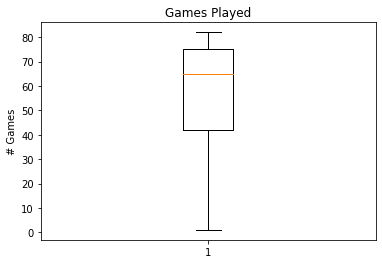

In [4]:
count_games = per_36min_df['G']
fig, ax = plt.subplots()
ax.set_title('Games Played')
ax.set_ylabel('# Games')
ax.boxplot(count_games)
plt.show()

In [5]:
bins = [ 0 , 11 , 21 , 31 , 41 , 51 , 61 , 71,  83]
group_names = ['0 - 10 games' , '10 - 20 games' , '20 - 30 games' , '30 - 40 games', '40 - 50 games', '50 - 60  games', '60 - 70', '70 or more games']

per_36min_df["Game Bins"] = pd.cut(per_36min_df["G"], bins, labels=group_names, include_lowest=True)
games_group = per_36min_df.groupby(["Game Bins"])
games_bins = games_group['G'].count()
games_bins

Game Bins
0 - 10 games         20
10 - 20 games        28
20 - 30 games        21
30 - 40 games        25
40 - 50 games        18
50 - 60  games       56
60 - 70              67
70 or more games    145
Name: G, dtype: int64

In [6]:
#['Player''Team''MP', 'FG', 'FGA','FGM','FT', 'FTA','FTM','TRB', 'AST', 'STL', 'BLK', 'TOV','PTS',
#'season17_18', 'Salary per min', 'Salary per 36 min']


In [7]:
per_36min_df = per_36min_df[['Player','Team','MP','G','season17_18','Salary per 36 min','Player Efficiency Rating']]
per_36min_df['Player Efficiency/ Yearly Salary'] =per_36min_df['Player Efficiency Rating'] / per_36min_df['season17_18'] * 1000
per_36min_df = per_36min_df.loc[per_36min_df['G'] >= 30]
per_36min_df = per_36min_df.sort_values(['season17_18'], ascending=False)
per_36min_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Player,Team,MP,G,season17_18,Salary per 36 min,Player Efficiency Rating,Player Efficiency/ Yearly Salary
465,Stephen Curry,GSW,1631.0,51.0,34682550.0,317218.32,34.0,0.000980
325,LeBron James,CLE,3026.0,82.0,33285709.0,304442.64,36.0,0.001082
417,Paul Millsap,DEN,1143.0,38.0,31269231.0,285999.12,22.2,0.000710
314,Kyle Lowry,TOR,2510.0,78.0,28703704.0,262533.96,25.4,0.000885
445,Russell Westbrook,OKC,2914.0,80.0,28530608.0,260950.68,33.9,0.001188
...,...,...,...,...,...,...,...,...
231,Jawun Evans,LAC,778.0,48.0,815615.0,7459.92,13.1,0.016061
86,Dakari Johnson,OKC,161.0,31.0,815615.0,7459.92,19.0,0.023295
497,Trey Burke,NYK,785.0,36.0,784160.0,7172.28,23.9,0.030478
503,Tyler Cavanaugh,ATL,518.0,39.0,729919.0,6676.20,18.1,0.024797


In [8]:
Top25_Salaries = per_36min_df.sort_values(['season17_18'], ascending=False)
Top25_Salaries.head(25)

,Player,Team,MP,G,season17_18,Salary per 36 min,Player Efficiency Rating,Player Efficiency/ Yearly Salary
465,Stephen Curry,GSW,1631.0,51.0,34682550.0,317218.32,34.0,0.000980
325,LeBron James,CLE,3026.0,82.0,33285709.0,304442.64,36.0,0.001082
417,Paul Millsap,DEN,1143.0,38.0,31269231.0,285999.12,22.2,0.000710
314,Kyle Lowry,TOR,2510.0,78.0,28703704.0,262533.96,25.4,0.000885
445,Russell Westbrook,OKC,2914.0,80.0,28530608.0,260950.68,33.9,0.001188
216,James Harden,HOU,2551.0,72.0,28299399.0,258836.04,35.1,0.001240
114,DeMar DeRozan,TOR,2711.0,80.0,27739975.0,253719.36,24.0,0.000865
6,Al Horford,BOS,2277.0,72.0,27734405.0,253668.24,23.9,0.000862
65,Carmelo Anthony,OKC,2501.0,78.0,26243760.0,240034.32,16.9,0.000644
88,Damian Lillard,POR,2670.0,73.0,26153057.0,239204.88,27.4,0.001048


In [9]:
per_36min_df['season17_18'].mean()

7921785.022151899

In [10]:
Top25_Efficiency = per_36min_df.sort_values(['Player Efficiency Rating'], ascending=False)
Top25_Efficiency.head(25)

,Player,Team,MP,G,season17_18,Salary per 36 min,Player Efficiency Rating,Player Efficiency/ Yearly Salary
325,LeBron James,CLE,3026.0,82.0,33285709.0,304442.64,36.0,0.001082
216,James Harden,HOU,2551.0,72.0,28299399.0,258836.04,35.1,0.001240
115,DeMarcus Cousins,NOP,1737.0,48.0,18063850.0,165218.04,34.8,0.001926
29,Anthony Davis,NOP,2727.0,75.0,23775506.0,217458.72,34.8,0.001464
252,Joel Embiid,PHI,1912.0,63.0,6100266.0,55794.96,34.5,0.005655
465,Stephen Curry,GSW,1631.0,51.0,34682550.0,317218.32,34.0,0.000980
445,Russell Westbrook,OKC,2914.0,80.0,28530608.0,260950.68,33.9,0.001188
300,Kevin Durant,GSW,2325.0,68.0,25000000.0,228658.68,33.4,0.001336
174,Giannis Antetokounmpo,MIL,2756.0,75.0,22471910.0,205535.88,33.0,0.001469
182,Hassan Whiteside,MIA,1364.0,54.0,23775506.0,217458.72,32.6,0.001371


In [11]:
per_36min_df['Player Efficiency Rating'].mean()

19.564873417721525

In [12]:
#Salaries
avg_salary = per_36min_df['season17_18'].mean()

quartiles_salary = per_36min_df['season17_18'].quantile([.25,.5,.75])
lowerq_salary = quartiles_salary[0.25]
upperq_salary = quartiles_salary[0.75]
iqr_salary = upperq_salary-lowerq_salary

lower_bound_salary = lowerq_salary - (1.5*iqr_salary)
upper_bound_salary = upperq_salary + (1.5*iqr_salary)
print(f"Values below {lower_bound_salary} could be outliers.")
print(f"Values above {upper_bound_salary} could be outliers.")
print(f'Average salary is {avg_salary}')
print(quartiles_salary)
print(iqr_salary)

Values below -14524699.0 could be outliers.
Values above 28928987.0 could be outliers.
Average salary is 7921785.022151899
0.25     1770433.25
0.50     4398400.00
0.75    12633854.75
Name: season17_18, dtype: float64
10863421.5


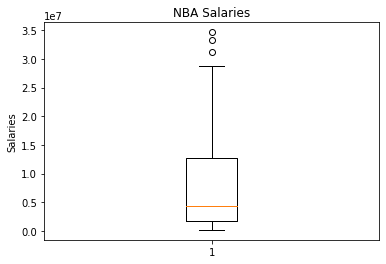

In [13]:
count_salary = per_36min_df['season17_18']
fig, ax = plt.subplots()
ax.set_title('NBA Salaries')
ax.set_ylabel('Salaries')
ax.boxplot(count_salary)
plt.show()

In [14]:
salary_outliers = per_36min_df.loc[per_36min_df['season17_18'] >= 12633854.75]
salary_outliers['Player'].count()

79

In [15]:
#Efficiency
avg_efficiency = per_36min_df['Player Efficiency Rating'].mean()

quartiles_efficiency = per_36min_df['Player Efficiency Rating'].quantile([.25,.5,.75])
lowerq_efficiency = quartiles_efficiency[0.25]
upperq_efficiency = quartiles_efficiency[0.75]
iqr_efficiency = upperq_efficiency-lowerq_efficiency

lower_bound_efficiency = lowerq_efficiency - (1.5*iqr_salary)
upper_bound_efficiency = upperq_efficiency + (1.5*iqr_salary)
print(f"Values below {lower_bound_efficiency} could be outliers.")
print(f"Values above {upper_bound_efficiency} could be outliers.")
print(f'Average efficicency is {avg_efficiency}')
print(quartiles_efficiency)
print(iqr_efficiency)

Values below -16295116.575 could be outliers.
Values above 16295154.95 could be outliers.
Average efficicency is 19.564873417721525
0.25    15.675
0.50    19.100
0.75    22.700
Name: Player Efficiency Rating, dtype: float64
7.025000000000002


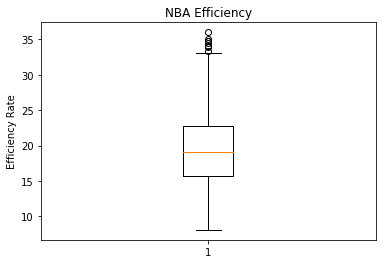

In [16]:
count_efficiency = per_36min_df['Player Efficiency Rating']
fig, ax = plt.subplots()
ax.set_title('NBA Efficiency')
ax.set_ylabel('Efficiency Rate')
ax.boxplot(count_efficiency)
plt.show()

In [17]:
by_team = per_36min_df.groupby(['Team']).mean()
by_team

,MP,G,season17_18,Salary per 36 min,Player Efficiency Rating,Player Efficiency/ Yearly Salary
Team,,,,,,
ATL,1391.727273,61.272727,5.966158e+06,54568.538182,19.372727,0.008512
BOS,1463.846154,63.230769,6.162006e+06,56359.800000,18.230769,0.007088
BRK,1683.500000,66.600000,6.455059e+06,59040.144000,19.970000,0.008298
CHI,1637.100000,65.900000,4.215757e+06,38558.808000,18.790000,0.007636
CHO,1576.416667,66.666667,9.522342e+06,87094.650000,18.291667,0.004296
CLE,1466.111111,63.888889,1.131352e+07,103477.400000,21.255556,0.005058
DAL,1559.818182,64.636364,6.368259e+06,58246.265455,19.763636,0.016934
DEN,1657.222222,64.666667,9.314364e+06,85192.320000,19.922222,0.004605
DET,1439.444444,63.555556,7.146598e+06,65365.200000,18.933333,0.005200


In [18]:
# per table above New Orleans played a season with players being injured and/or team did not have depth

In [19]:
by_team['Salary Rank'] = by_team['season17_18'].rank(pct=True)
by_team

,MP,G,season17_18,Salary per 36 min,Player Efficiency Rating,Player Efficiency/ Yearly Salary,Salary Rank
Team,,,,,,,
ATL,1391.727273,61.272727,5.966158e+06,54568.538182,19.372727,0.008512,0.133333
BOS,1463.846154,63.230769,6.162006e+06,56359.800000,18.230769,0.007088,0.200000
BRK,1683.500000,66.600000,6.455059e+06,59040.144000,19.970000,0.008298,0.266667
CHI,1637.100000,65.900000,4.215757e+06,38558.808000,18.790000,0.007636,0.033333
CHO,1576.416667,66.666667,9.522342e+06,87094.650000,18.291667,0.004296,0.766667
CLE,1466.111111,63.888889,1.131352e+07,103477.400000,21.255556,0.005058,0.966667
DAL,1559.818182,64.636364,6.368259e+06,58246.265455,19.763636,0.016934,0.233333
DEN,1657.222222,64.666667,9.314364e+06,85192.320000,19.922222,0.004605,0.700000
DET,1439.444444,63.555556,7.146598e+06,65365.200000,18.933333,0.005200,0.433333


In [20]:
nba_stats = 'nba_team_stats_00_to_18.csv'
nba_stats = pd.read_csv(nba_stats, index_col = False)
nba_stats_df = pd.DataFrame(nba_stats)

In [21]:
season_stats_df = nba_stats_df.loc[ nba_stats_df['SEASON'] >= "2017-18"]

In [22]:
season_stats_df = season_stats_df.loc[ season_stats_df['SEASON'] < "2018-19"]

In [23]:
#calculate avg. missed field goal attempts

season_stats_df["FG Missed"] = season_stats_df["FGA"] - season_stats_df["FGM"]

#calculate avg. missed free throw attempts

season_stats_df["FT Missed"] = season_stats_df["FTA"] - season_stats_df["FTM"]

#calculate player efficiency formula: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO)

season_stats_df["Team Efficiency Rating"] = season_stats_df["PTS"] + season_stats_df["REB"] + season_stats_df["AST"] + season_stats_df["STL"] + season_stats_df["BLK"] - season_stats_df["FG Missed"] - season_stats_df["FT Missed"]

season_stats_df.reset_index()

,index,Name,Team,GP,W,L,WIN%,MIN,PTS,FGM,...,STL,BLK,BLKA,PF,PFD,+/-,SEASON,FG Missed,FT Missed,Team Efficiency Rating
0,30,Atlanta Hawks,ATL,82,24,58,0.293,48.1,103.4,38.2,...,7.8,4.2,5.5,19.6,20.3,-5.5,2017-18,47.3,4.4,129.3
1,31,Boston Celtics,BOS,82,55,27,0.671,48.3,104.0,38.3,...,7.4,4.5,4.4,19.7,19.2,3.6,2017-18,46.8,4.7,131.4
2,32,Brooklyn Nets,BRK,82,28,54,0.341,48.4,106.6,38.2,...,6.2,4.8,5.5,20.6,19.7,-3.7,2017-18,48.6,5.2,131.9
3,33,Charlotte Hornets,CHO,82,36,46,0.439,48.2,108.2,39.0,...,6.8,4.5,4.9,17.2,22.4,0.3,2017-18,47.7,6.8,132.1
4,34,Chicago Bulls,CHI,82,27,55,0.329,48.4,102.9,38.7,...,7.6,3.5,5.2,19.2,17.4,-7.0,2017-18,50.1,4.6,127.5
5,35,Cleveland Cavaliers,CLE,82,50,32,0.610,48.1,110.9,40.4,...,7.1,3.8,4.1,18.6,20.7,0.9,2017-18,44.4,5.2,137.7
6,36,Dallas Mavericks,DAL,82,24,58,0.293,48.3,102.3,38.1,...,7.0,3.8,4.5,19.2,19.6,-3.0,2017-18,47.8,4.5,124.8
7,37,Denver Nuggets,DEN,82,46,36,0.561,48.5,110.0,40.7,...,7.6,4.9,4.8,18.7,20.7,1.5,2017-18,45.9,5.2,141.0
8,38,Detroit Pistons,DET,82,39,43,0.476,48.3,103.8,39.1,...,7.7,3.9,4.9,18.4,18.4,-0.1,2017-18,47.8,5.1,129.0
9,39,Golden State Warriors,GSW,82,58,24,0.707,48.1,113.5,42.8,...,8.0,7.5,3.7,19.6,18.5,6.0,2017-18,42.3,3.7,155.8


In [26]:
season_stats_df["Wins Rank"] = season_stats_df['WIN%'].rank(pct=True)
season_stats_df["Team Eff Rank"] = season_stats_df['Team Efficiency Rating'].rank(pct=True)

In [114]:
total_team_df = pd.merge(season_stats_df, by_team, on="Team")
total_team_df = total_team_df[['Team','Wins Rank','Salary Rank','Team Eff Rank']]
total_team_df = total_team_df.set_index("Team")
total_team_df
sorted_team_df = total_team_df.sort_values("Wins Rank",ascending=False)
sorted_team_df

,Wins Rank,Salary Rank,Team Eff Rank
Team,,,
HOU,1.000000,0.900000,0.833333
TOR,0.966667,0.666667,0.900000
GSW,0.933333,0.800000,1.000000
BOS,0.900000,0.200000,0.366667
PHI,0.866667,0.466667,0.933333
CLE,0.833333,0.966667,0.800000
POR,0.800000,0.833333,0.300000
UTA,0.716667,0.600000,0.600000
IND,0.716667,0.500000,0.533333


In [122]:
Salary = sorted_team_df["Salary Rank"]
Wins = sorted_team_df["Wins Rank"]
Efficiency = sorted_team_df["Team Eff Rank"]
color_list = ['b', 'g', 'y', 'c']

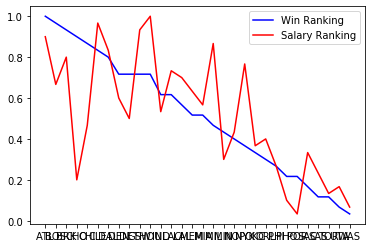

<Figure size 432x288 with 0 Axes>

In [123]:
# Plot the stats as a line chart
Win_line, = plt.plot(Teams, Wins, color="blue", label="Win Ranking",)
Salary_line, = plt.plot(Teams, Salary, color="red", label="Salary Ranking",)

# Create a legend for our chart
plt.legend(handles=[Win_line, Salary_line], loc="best")

# Show the chart
plt.show()
plt.tight_layout()

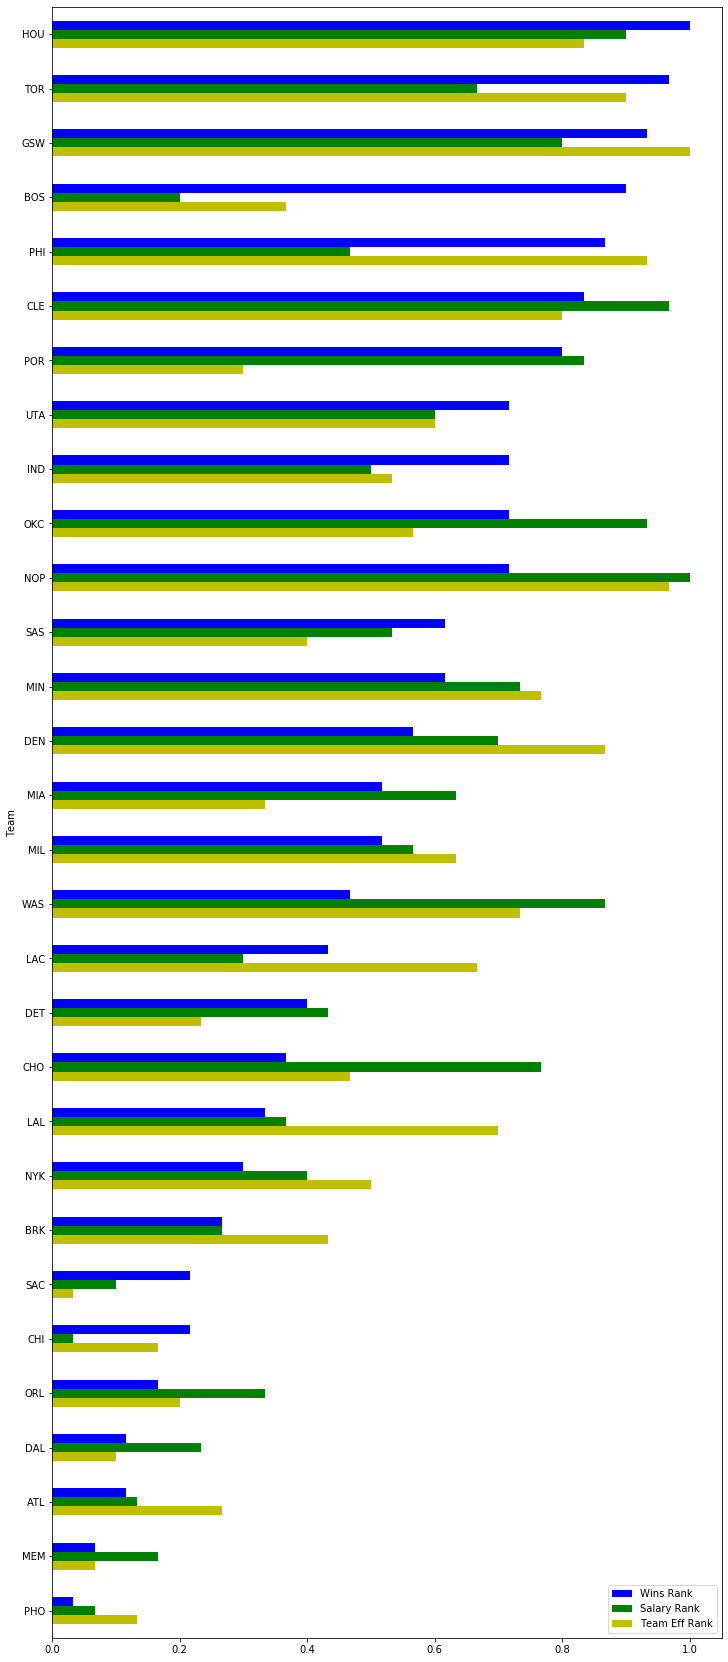

In [124]:
#sorted_team_df.plot(kind="barh",label="Team Results",figsize=(8,30))
#plt.legend()
#plt.show()
#plt.tight_layout()

ax = sorted_team_df.plot.barh(label = "Team Wins vs Salary vs Efficiency", figsize = (12,30), color=color_list)
ax.invert_yaxis()